In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [8]:
# Load the dataset (replace 'data.csv' with the actual filename)
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [9]:
data.shape

(10000, 12)

In [10]:
# Display the firtst 10 rows
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
# Discribe the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
# Describe the statistics of the numerical variables
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Check columns list and missing values
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [14]:
# Get unique count for each variable
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [15]:
# Drop the columns as explained above
data = data.drop(["customer_id", "credit_score", "country"], axis = 1)

In [16]:
# Check variable data types
data.dtypes

gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

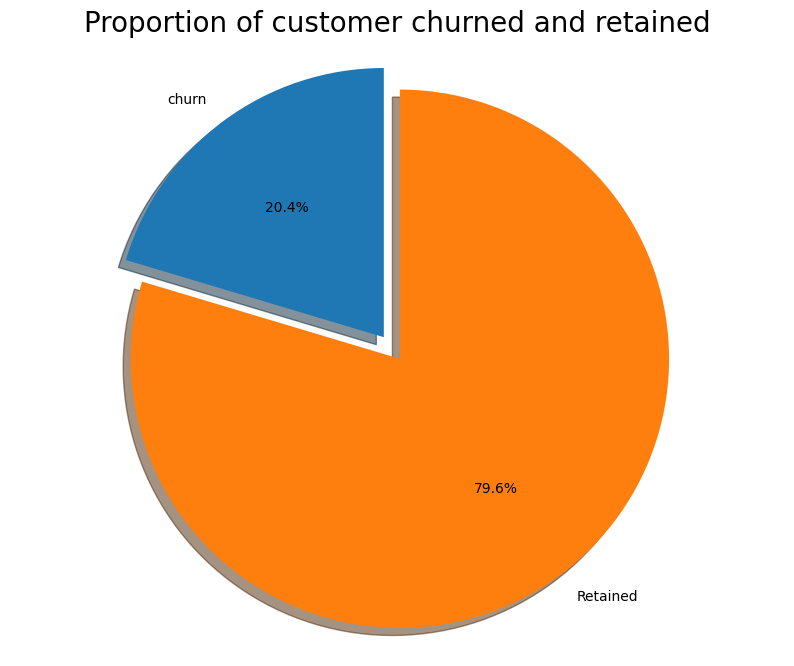

In [17]:
labels = 'churn', 'Retained'
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [18]:
# Count the number of occurrences of each unique value in the 'Exited' column
data['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [19]:
# Convert to percentage format
data['churn'].value_counts(normalize=True) * 100

churn
0    79.63
1    20.37
Name: proportion, dtype: float64

<Axes: xlabel='active_member', ylabel='count'>

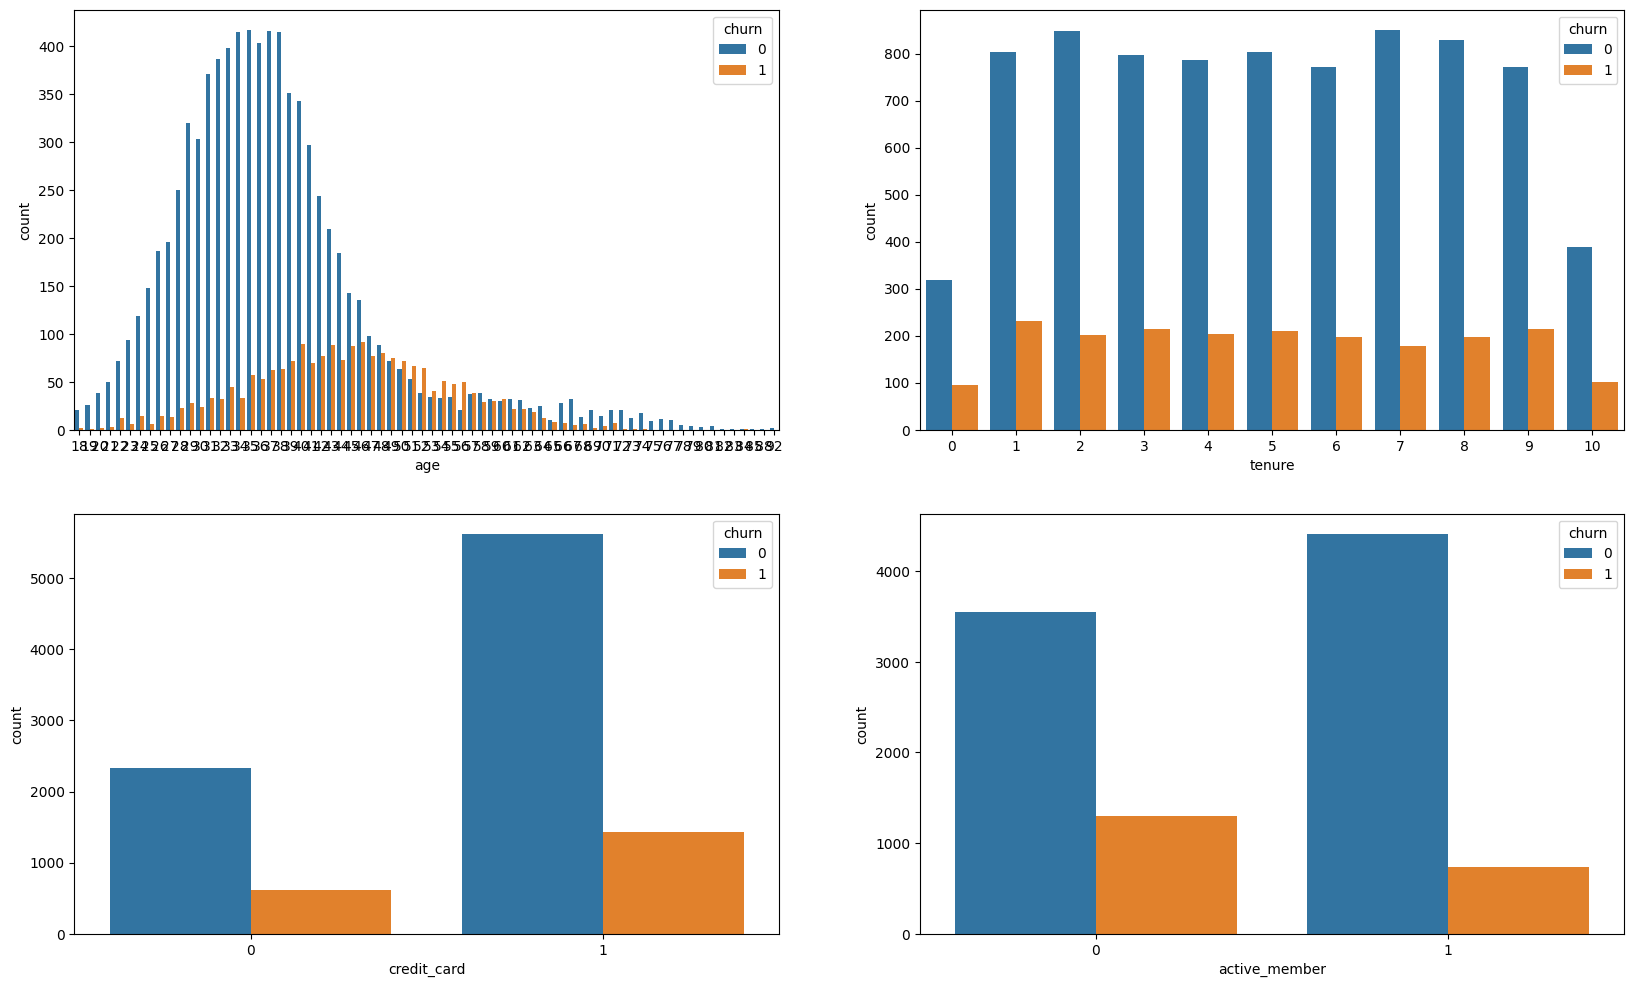

In [20]:
# For example:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='age', hue = 'churn',data = data, ax=axarr[0][0])
sns.countplot(x='tenure', hue = 'churn',data = data, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = data, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn',data = data, ax=axarr[1][1])

<Axes: xlabel='churn', ylabel='estimated_salary'>

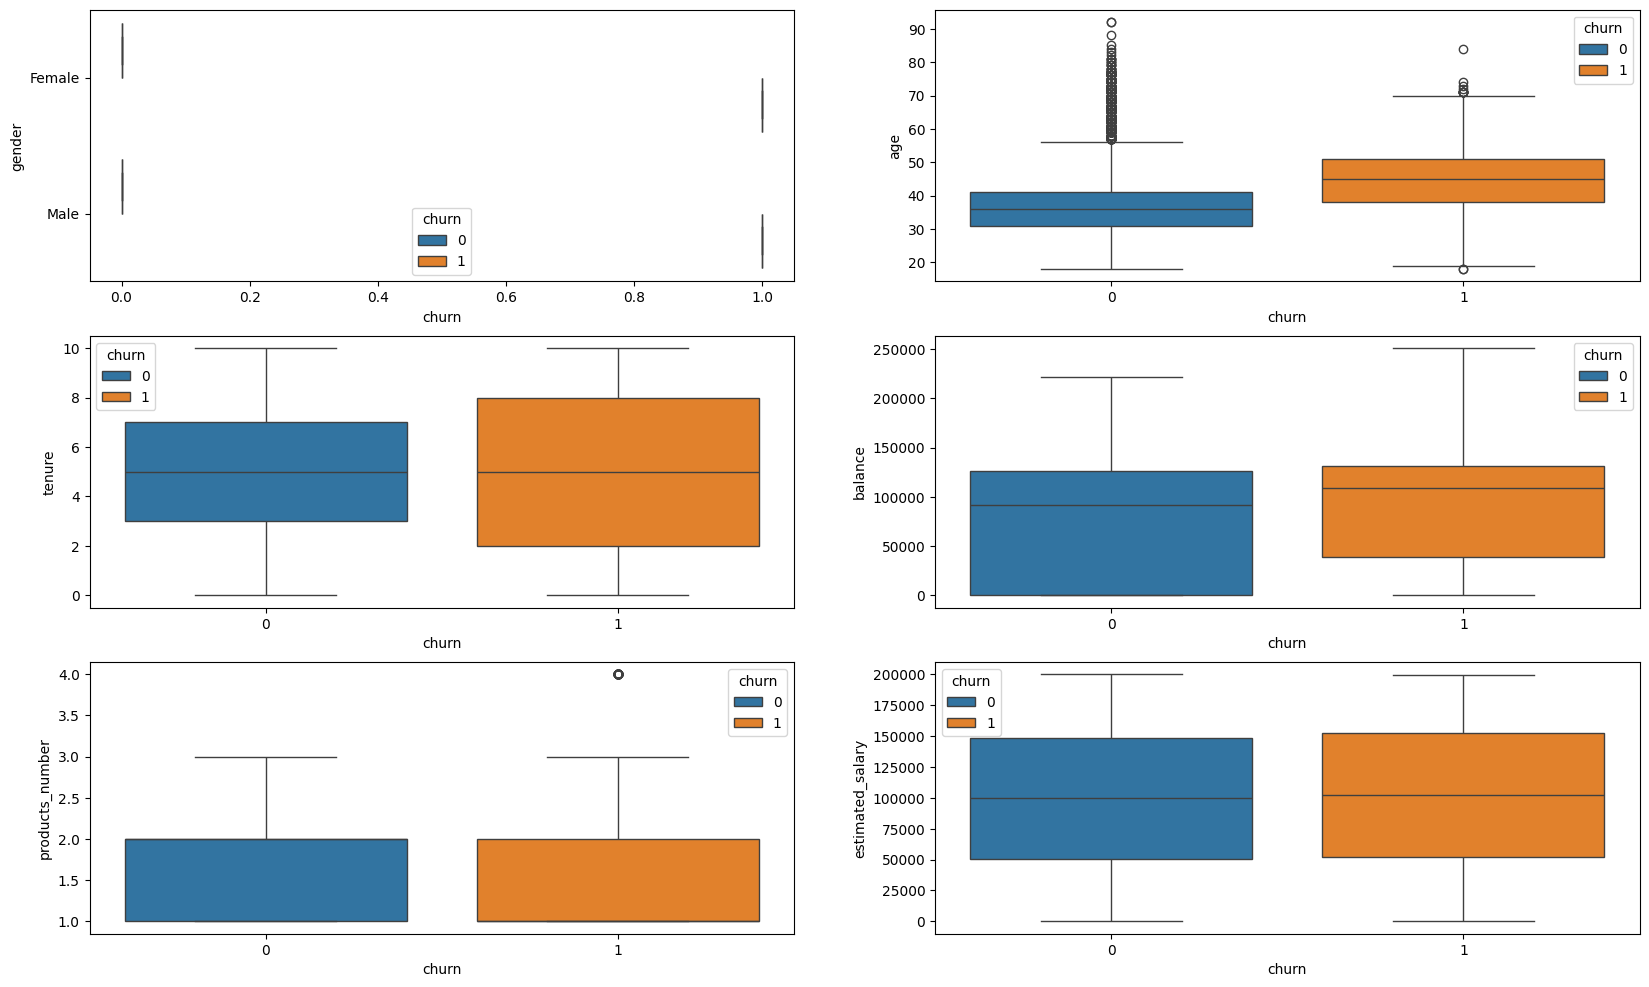

In [21]:
# Define your figure and axes outside the block where you encounter the error
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='gender',x = 'churn', hue = 'churn',data = data, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = data, ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = data, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = data, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = data, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = data, ax=axarr[2][1])

In [22]:
# Split Train, test data
data_train = data.sample(frac=0.8,random_state=200)
data_test = data.drop(data_train.index)
print(len(data_train))
print(len(data_test))

8000
2000


(-1.0, 5.0)

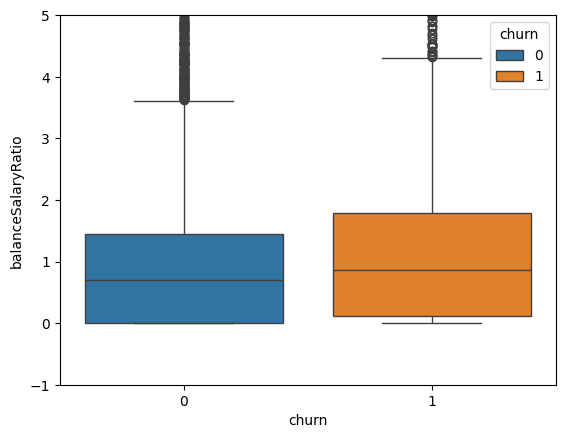

In [23]:
data_train['balanceSalaryRatio'] = data_train.balance/data_train.estimated_salary
sns.boxplot(y='balanceSalaryRatio',x = 'churn', hue = 'churn',data = data_train)
plt.ylim(-1, 5)

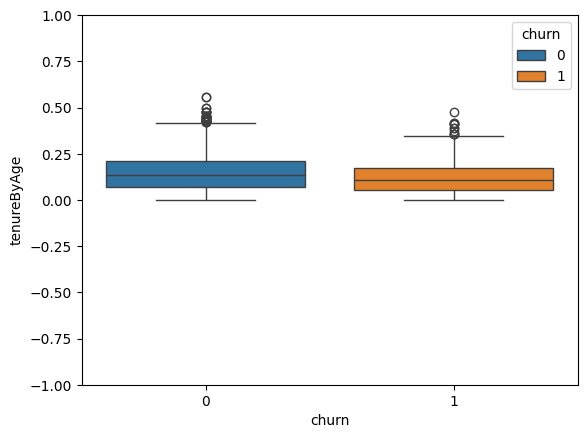

In [24]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
data_train['tenureByAge'] = data_train.tenure/(data_train.age)
sns.boxplot(y='tenureByAge',x = 'churn', hue = 'churn',data = data_train)
plt.ylim(-1, 1)
plt.show()

In [25]:
# Assuming you have a DataFrame named data_train with columns 'actual_credit_score_column_name' and 'age'
# For demonstration purposes, let's create a sample DataFrame
data_train = pd.DataFrame({
    'actual_credit_score_column_name': [700, 750, 800],
    'age': [30, 35, 40]
})

In [27]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
data_train['credit_scoreGivenage'] = data_train['actual_credit_score_column_name'] / data_train['age']

In [34]:
# Resulting Data Frame
data_train.head()

,actual_credit_score_column_name,age,credit_scoreGivenage
0,700,30,23.333333
1,750,35,21.428571
2,800,40,20.000000


In [38]:
# Print the column names of the DataFrame
print(data_train.columns)

# Check the actual column names in the DataFrame and ensure they match the expected ones

Index(['actual_credit_score_column_name', 'age', 'credit_scoreGivenage'], dtype='object')


In [52]:
# Define the columns with categorical variables and numerical variables
categorical_vars = ['CreditScore', 'Age', ...]  # List of column names with categorical variables
numeric_cols = ['numeric_column1', 'numeric_column2', ...]              # List of column names with numerical variables

In [64]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['gender',  'age', 'tenure', 'balance','NumOfProducts', 'estimated_salary', 'balanceSalaryRatio',
                   'tenureByAge','credit_coreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

In [68]:
# Data preprocessing
# Drop unnecessary columns or columns that contain sensitive information
data = data.drop(['churn',], axis=1)

In [69]:
# Handle missing values
data = data.dropna()

In [70]:
# Encode categorical variables (if any)
data = pd.get_dummies(data, columns=[])

In [74]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Encode categorical variables (if any)
X_train_encoded = pd.get_dummies(X_train, columns=['estimated_salary'])
X_test_encoded = pd.get_dummies(X_test, columns=['estimated_salary'])

In [76]:
print(X_train_encoded.dtypes)

age                             int64
tenure                          int64
balance                       float64
products_number                 int64
credit_card                     int64
active_member                   int64
estimated_salary_90.07           bool
estimated_salary_91.75           bool
estimated_salary_96.27           bool
estimated_salary_106.67          bool
estimated_salary_178.19          bool
estimated_salary_216.27          bool
estimated_salary_236.45          bool
estimated_salary_247.36          bool
estimated_salary_287.99          bool
estimated_salary_332.81          bool
estimated_salary_343.38          bool
estimated_salary_371.05          bool
estimated_salary_428.23          bool
estimated_salary_440.2           bool
estimated_salary_447.73          bool
estimated_salary_468.94          bool
estimated_salary_479.54          bool
estimated_salary_487.3           bool
estimated_salary_502.7           bool
estimated_salary_523.0           bool
estimated_sa

In [79]:
# Assuming X_train_encoded is your training dataset

# Extract column names and their data types
column_types = X_train_encoded.dtypes

# Identify categorical and numerical columns based on their data types
categorical_cols = column_types[column_types == 'object'].index.tolist()
numeric_cols = column_types[column_types != 'object'].index.tolist()

In [80]:
categorical_cols = ['Gender', 'Education', 'Country']
numeric_cols = ['Age', 'Income', 'Number of Children']

In [130]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [84]:
# Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

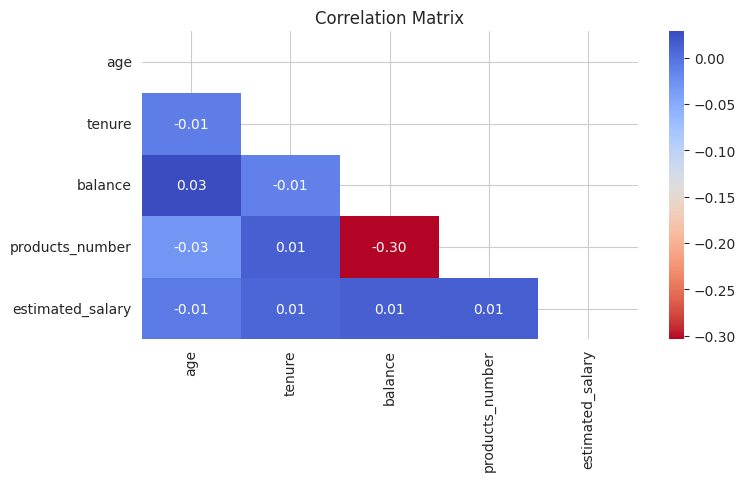

In [190]:
# Select the numerical features from the data DataFrame
numerical_features = data[['age', 'tenure', 'balance', 'products_number',  'estimated_salary']]

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a figure and axis
plt.figure(figsize=(8, 4))

# Create a heatmap of the correlation matrix with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", mask=mask)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [191]:
# Define the features and target variable
X = data.drop(['estimated_salary'], axis=1)
y = data['estimated_salary']

# Unique value counts for each column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              10000 non-null  int64  
 1   tenure           10000 non-null  int64  
 2   balance          10000 non-null  float64
 3   products_number  10000 non-null  int64  
 4   credit_card      10000 non-null  int64  
 5   active_member    10000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [192]:
def feature_data(data):

    data['Senior'] = data['Age'].apply(lambda x: 1 if x >= 60 else 0)
    data['Active_by_CreditCard'] = data['HasCrCard'] * data['IsActiveMember']
    data['Products_Per_Tenure'] =  data['Tenure'] / data['NumOfProducts']
    data['AgeCat'] = np.round(data.Age/20).astype('int').astype('category')
    return data

In [193]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8000 non-null   int64  
 1   tenure            8000 non-null   int64  
 2   balance           8000 non-null   float64
 3   products_number   8000 non-null   int64  
 4   credit_card       8000 non-null   int64  
 5   active_member     8000 non-null   int64  
 6   estimated_salary  8000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 500.0 KB
